MATHEMATICAL AND COMPUTATIONAL MODELS FOR COMPLEX SYSTEMS
Lecturer: MARCO ALBERTO JAVARONE

Laboratory works
Authors:
Vyacheslav Burdinskiy BurdinskiyVA@gmail.com
Sergey Yakimov yakimovsergey26@gmail.com

In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 24 09:55:50 2018

@author: marcoj
"""

from numpy import float
from numpy import *

from real_node import *
from real_node import real_node

from numpy.core.numeric import zeros
from time import clock
import random


def weighted_choice(weights):
    totals = []
    running_total = 0

    for w in weights:
        running_total += w
        totals.append(running_total)

    rnd = random.random() * running_total
    for i, total in enumerate(totals):
        if rnd < total:
            return i


def compute_magnetization(agents):
    magnetization = 0.0

    w = 0
    while w < len(agents):
        magnetization = magnetization + agents[w].spin

        w += 1

    return magnetization / w


def compute_energy(random_agent, current_spin, neigh_list, agents):
    energy = 0.0

    w = 0
    while w < len(neigh_list):
        current_neigh = neigh_list[w]

        energy = energy + current_spin * agents[current_neigh].spin

        w += 1

    energy = energy * (-1)

    return energy


def run_ising(agents, temperature, time_step):
    mag = 0.0

    k = 0
    while k < time_step:
        random_agent = random.randint(0, len(agents) - 1)

        initial_energy = 0

        its_spin = agents[random_agent].spin

        neigh_list = agents[random_agent].neigh

        initial_energy = compute_energy(random_agent, its_spin, neigh_list, agents)

        inverse_spin = its_spin * (-1)

        second_energy = compute_energy(random_agent, inverse_spin, neigh_list, agents)

        delta_energy = second_energy - initial_energy

        if delta_energy <= 0:

            agents[random_agent].UpdateSpin(inverse_spin)

        else:
            result = 2
            probability_change = exp(-delta_energy / temperature)
            prob_list = [probability_change, 1.0 - probability_change]

            result = weighted_choice(prob_list)

            if result == 0:
                agents[random_agent].UpdateSpin(inverse_spin)

        k += 1

    mag = compute_magnetization(agents)

    return mag


def generate_lattice_2d(nr_agent):
    lista_starting = []
    # lista_final = []
    # lista_variation = []

    x = 0
    w = 0
    while (x < nr_agent):

        y = x
        w = 0
        while (w < (sqrt(nr_agent) - 1)):
            lista_starting.append((y, y + 1))
            lista_starting.append((y + 1, y))
            y += 1
            w += 1
        x += int(sqrt(nr_agent))
    # up down
    x = 0
    w = 0
    while (x < sqrt(nr_agent)):

        y = x
        w = 0
        while (w < (nr_agent - sqrt(nr_agent))):
            lista_starting.append((int(y + sqrt(nr_agent)), y))
            lista_starting.append((y, (int(y + sqrt(nr_agent)))))
            y += int(sqrt(nr_agent))
            w += sqrt(nr_agent)

        x += 1

    ###aggiungo periodic boundary up down
    x = 0
    y = 0
    while (x < sqrt(nr_agent)):
        y = x + (sqrt(nr_agent) - 1) * sqrt(nr_agent)
        lista_starting.append((x, int(y)))
        lista_starting.append((int(y), x))

        x += 1
    ###boundary right left

    x = 0
    y = 0
    while (x < nr_agent):
        y = x + sqrt(nr_agent) - 1
        lista_starting.append((x, int(y)))
        lista_starting.append((int(y), x))
        x += int(sqrt(nr_agent))

    return lista_starting


def get_neighs(my_lattice, k):
    my_list = []

    w = 0
    while w < len(my_lattice):

        elem = my_lattice[w]
        if elem[0] == k:
            my_list.append(elem[1])

        w += 1

    return my_list


nr_agent = 100

my_lattice = generate_lattice_2d(nr_agent)

start = clock()

agents = []
k = 0

my_spin = 0

while k < nr_agent:

    agents.append(real_node(k))

    random_spin = random.randint(0, 2)
    if random_spin == 0:
        my_spin = 1
    elif random_spin == 1:
        my_spin = -1
    # else:
    # print("Error spin")

    agents[k].UpdateSpin(my_spin)

    k += 1

k = 0
while k < nr_agent:
    neighs = get_neighs(my_lattice, k)

    agents[k].neigh = neighs

    k += 1

# Metropolis
Temperature = 2.1
time_step = 5000
nr_simulation = 50

mag_list = []

magnetization = 0.0


def base():
    w = 0
    while w < nr_simulation:
        magnetization = run_ising(agents, Temperature, time_step)

        mag_list.append(magnetization)

        w += 1

    magnetization = 0.0
    w = 0
    while w < len(mag_list):
        magnetization = magnetization + mag_list[w]

        w += 1

    print("Avg Magnetization: ", magnetization / w)


def compute_conformist_probopility(agents, neigh_list):
    def get_count_positiv_neigh():
        count_positiv_neigh = 0
        for neigh_index in neigh_list:
            energy = agents[neigh_index].spin
            if (energy == 1):
                count_positiv_neigh += 1

        return count_positiv_neigh

    count_positiv_spin = get_count_positiv_neigh()
    flip_probability = count_positiv_spin / len(neigh_list)
    no_flip_probability = 1 - flip_probability
    return flip_probability, no_flip_probability


def conformist_probopility():
    k = 0
    while k < time_step:
        random_agent = random.randint(0, len(agents) - 1)

        its_spin = agents[random_agent].spin
        inverse_spin = its_spin * (-1)
        neigh_list = agents[random_agent].neigh

        flip_probability, not_flip_probability = compute_conformist_probopility(agents, neigh_list)

        prob_list = [flip_probability, 1.0 - not_flip_probability]

        result = weighted_choice(prob_list)

        if result == 0:
            agents[random_agent].UpdateSpin(inverse_spin)

        k += 1

    mag = compute_magnetization(agents)

    return mag


def simulations_conformist():
    magnetization = 0.0
    conformist_magnetizations = []
    w = 0
    while w < nr_simulation:
        magnetization = conformist_probopility()
        conformist_magnetizations.append(magnetization)
        w += 1

    magnetization = 0.0
    sum_conformist_magnetizations = sum(conformist_magnetizations)

    print("Avg Magnetization (simulations_conformist): ", sum_conformist_magnetizations / w)


def get_merge_conformist_temperature(temperature, percent_conformist, time_step):
    def for_temperature():
        initial_energy = 0

        its_spin = agents[random_agent].spin

        neigh_list = agents[random_agent].neigh

        initial_energy = compute_energy(random_agent, its_spin, neigh_list, agents)

        inverse_spin = its_spin * (-1)

        second_energy = compute_energy(random_agent, inverse_spin, neigh_list, agents)

        delta_energy = second_energy - initial_energy

        if delta_energy <= 0:

            agents[random_agent].UpdateSpin(inverse_spin)

        else:
            import numpy as np
            probability_change = np.exp(-delta_energy / temperature)
            prob_list = [probability_change, 1.0 - probability_change]

            result = weighted_choice(prob_list)

            if result == 0:
                agents[random_agent].UpdateSpin(inverse_spin)

    def for_conformist():
        its_spin = agents[random_agent].spin
        inverse_spin = its_spin * (-1)
        neigh_list = agents[random_agent].neigh

        flip_probability, not_flip_probability = compute_conformist_probopility(agents, neigh_list)

        prob_list = [flip_probability, 1.0 - not_flip_probability]

        result = weighted_choice(prob_list)

        if result == 0:
            agents[random_agent].UpdateSpin(inverse_spin)

    mag = 0.0
    k = 0
    while k < time_step:
        random_agent = random.randint(0, len(agents) - 1)
        is_temperature = agents[random_agent].behavior > percent_conformist
        if (is_temperature):
            for_temperature()
        else:
            for_conformist()

        k += 1

    mag = compute_magnetization(agents)

    return mag


def get_data_for_graph(temperature_range, percent_conformist_range, time_step, count_simulation=1):
    def get_avg_magnetization(temper, percent_conformist):
        magnetization = 0.0
        number_simulation = 0
        while number_simulation < count_simulation:
            magnetization += abs(get_merge_conformist_temperature(temper, percent_conformist, time_step))
            number_simulation += 1

        avg = magnetization / count_simulation
        return avg

    result_temperatures = []
    result_percent_conformist = []
    result_magnetization = []
    for temper in temperature_range:
        for percent_conformist in percent_conformist_range:
            avg_magnetization = get_avg_magnetization(temper, percent_conformist)
            result_magnetization.append(avg_magnetization)
            result_temperatures.append(temper)
            result_percent_conformist.append(percent_conformist)

    return {'temperatures': result_temperatures,
            'percent_conformist': result_percent_conformist,
            'magnetization': result_magnetization}


def create_graph(time_step, count_simulation=10):
    temperature_range = get_temperature_range()
    percent_conformist_range = get_percent_conformist_range()
    data = get_data_for_graph(temperature_range, percent_conformist_range, time_step, count_simulation)
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    baseFigure = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(baseFigure, elev=-150, azim=110)
    ax.set_xlabel("temperatures")
    ax.set_ylabel("percent conformist")
    ax.set_zlabel("magnetization")
    ax.scatter(data['temperatures'], data['percent_conformist'], data['magnetization'])


def get_temperature_range():
    temperatures = []
    start = 1
    for x in range(0, 25):
        temperatures.append(start)
        start += 0.25
    return temperatures


def get_percent_conformist_range():
    percent_conformist = []
    start = 0.0
    for x in range(0, 10):
        percent_conformist.append(start)
        start += 0.1
    return percent_conformist


def create_graph_temperature_range(time_step, count_simulation=10):
    temperature_range = get_temperature_range()
    percent_conformist_range = [0]

    data = get_data_for_graph(temperature_range, percent_conformist_range, time_step, count_simulation)

    import matplotlib.pyplot as plt
    plt.plot(data['temperatures'], data['magnetization'], 'ro')
    plt.axis([-0.1, 10, -0.1, 1.1])
    plt.xlabel('temperature')
    plt.ylabel('magnetization')
    plt.show()


def simulations_merge_conformist_temperature():
    magnetization = 0.0
    conformist_magnetizations = []
    w = 0
    while w < nr_simulation:
        magnetization = get_merge_conformist_temperature(border_behavior=0.7)
        conformist_magnetizations.append(magnetization)
        w += 1

    magnetization = 0.0
    sum_conformist_magnetizations = sum(conformist_magnetizations)

    print("Avg Magnetization (simulations_conformist): ", sum_conformist_magnetizations / w)



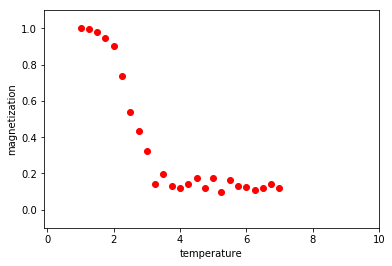

In [19]:
create_graph_temperature_range(time_step=18000, count_simulation=10)

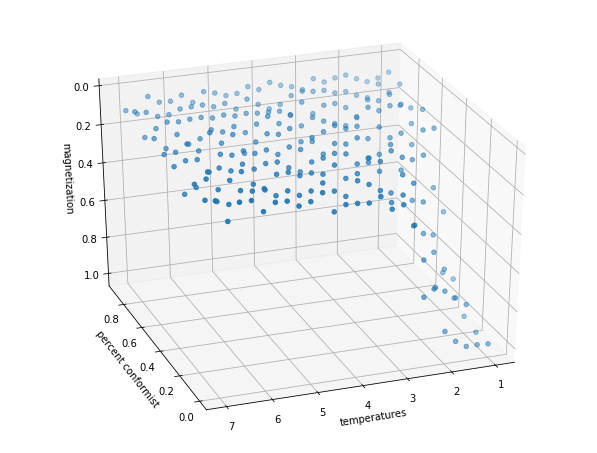

In [21]:
create_graph(time_step=10000,
             count_simulation=10)  # number of operations = temperatures=25 * 10 * time_step=10000 * count_simulation=10


to view the graph in 3d

In [6]:
from matplotlib import pyplot as plt
%matplotlib qt
create_graph(time_step=10000,
             count_simulation=10)  # number of operations = temperatures=25 * 10 * time_step=10000 * count_simulation=10